# Avacado Case Study

## Import Library

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
import scipy as stats
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
## Import dataset

In [300]:
df = pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Avacado Project
Problem Statement: Avocado is a fruit consumed by people heavily in the United States.

Content This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [301]:
# Dropping the irrelevant column Unnamed:0

df.drop("Unnamed: 0", axis = 1, inplace = True)

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
# Check top 5 rows

df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [303]:
# Check bottom 5 rows

df.tail(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets start Exploratory Data Analysis.

In [304]:
df.shape

(16468, 13)

In [305]:
# Lets check their datatype

df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [306]:
# Lets change date column from object data type to datetime data type

df['Date'] = pd.to_datetime(df['Date'])

In [307]:
# extract Month & day from date

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [308]:
df.drop('Date',axis = 1, inplace = True)

In [309]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0


In [310]:
# After dropping 'Date' column we can check new data frame

df.shape

(16468, 14)

In [311]:
# checking null parameters

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   float64
 11  region        1517 non-null   object 
 12  Month         1517 non-null   float64
 13  Day           1517 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.8+ MB


In [312]:
# Checking null values in the dataset

df.isnull().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
Month           14951
Day             14951
dtype: int64

In [315]:
df=df.dropna()

In [318]:
# Check columns in the dataset

df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [319]:

# Check data uniqueness in target variable

df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58])

In [320]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [321]:
# List of values in the target variable

df["AveragePrice"].value_counts()

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64

In [322]:
## Statistcal description of dataset

df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


Seperating numerical and catagorical data columns

In [323]:
# for categorical columns

categorical_col = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)

print(categorical_col)

['type', 'region']


# we have 2 columns as catagorical columns which we need to encode using one hot encoder or label encoder.

In [324]:
# Now checking for numerical columns

numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)

print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# DATA VISUALIZATION
Univariate analysis

In [325]:
#Visualize the count of type of the avocado

print(df['type'].value_counts())


conventional    1517
Name: type, dtype: int64



# above plot shows demand of both type of avocados being equal.

2015.0    1270
2016.0     247
Name: year, dtype: int64


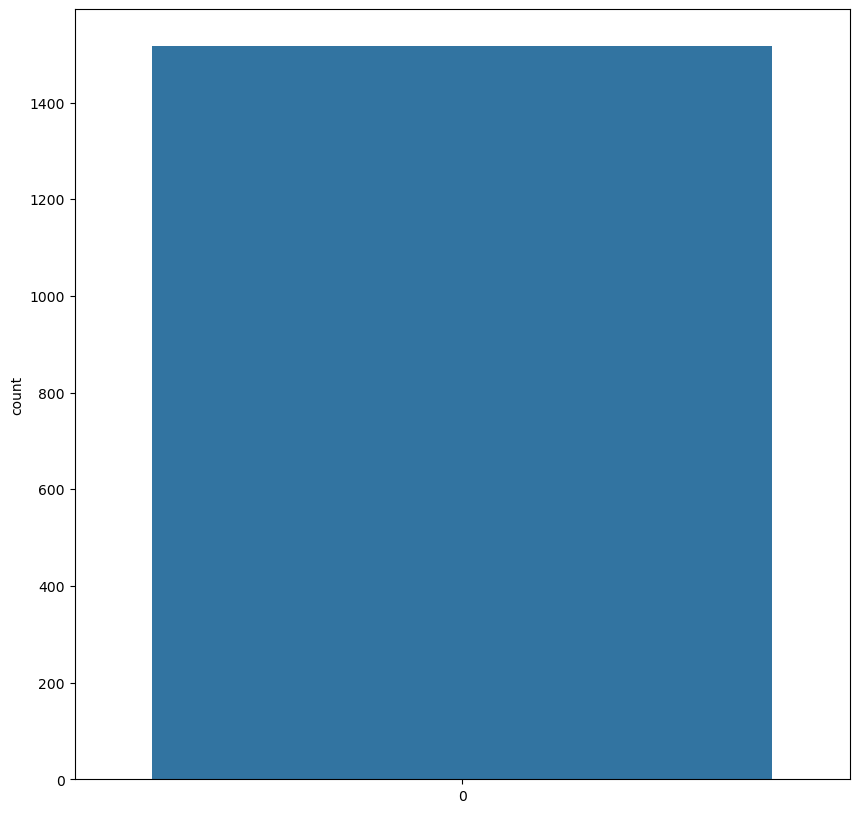

In [326]:
# count of year

print(df['year'].value_counts())

plt.figure(figsize = (10, 10))

sns.countplot(df['year'])

plt.show()

In [327]:
#Visualize the count of year

print(df['region'].value_counts())


California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [328]:
# #Count plot for all categorical columns
# for i in categorical_col:              
#     plt.figure(figsize = (8, 4))
#     sns.countplot(x=categorical_col[i])
#     plt.title(i)
#     plt.xticks(rotation=90)
#     plt.show()

Lets check data distribution

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64


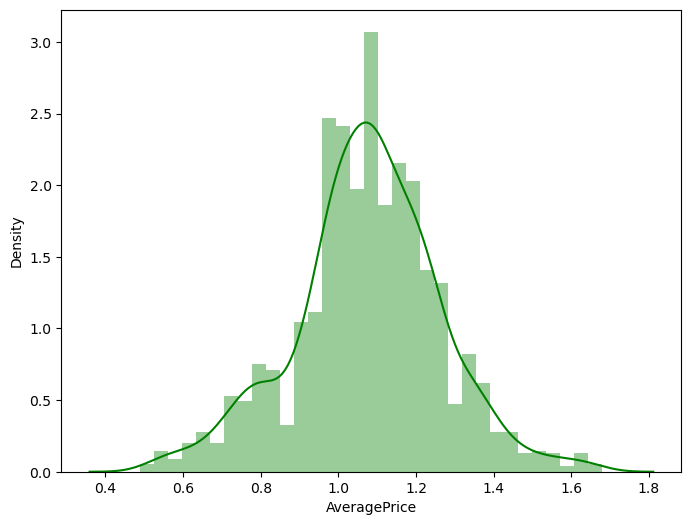

In [329]:
# Distribution plot for target variable AveragePrice

print(df["AveragePrice"].value_counts())

plt.figure(figsize = (8, 6))

sns.distplot(df["AveragePrice"], color = 'g')

plt.show()

2015.0    1270
2016.0     247
Name: year, dtype: int64


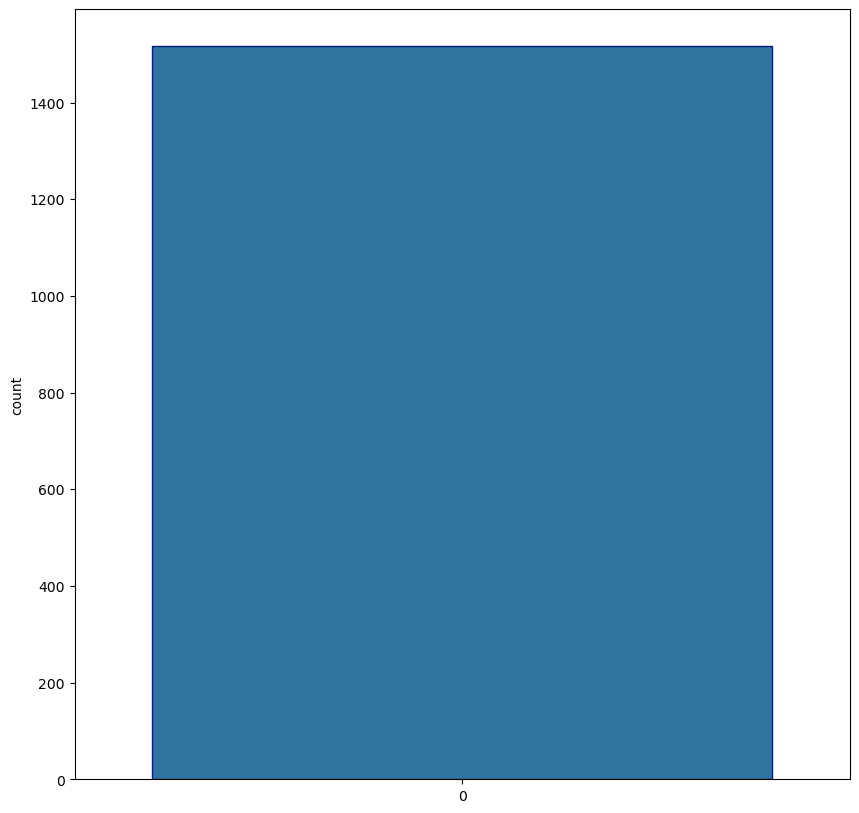

In [330]:
print(df['year'].value_counts())

plt.figure(figsize = (10, 10))

sns.countplot(df['year'], edgecolor = sns.color_palette("dark", 5))

plt.show()

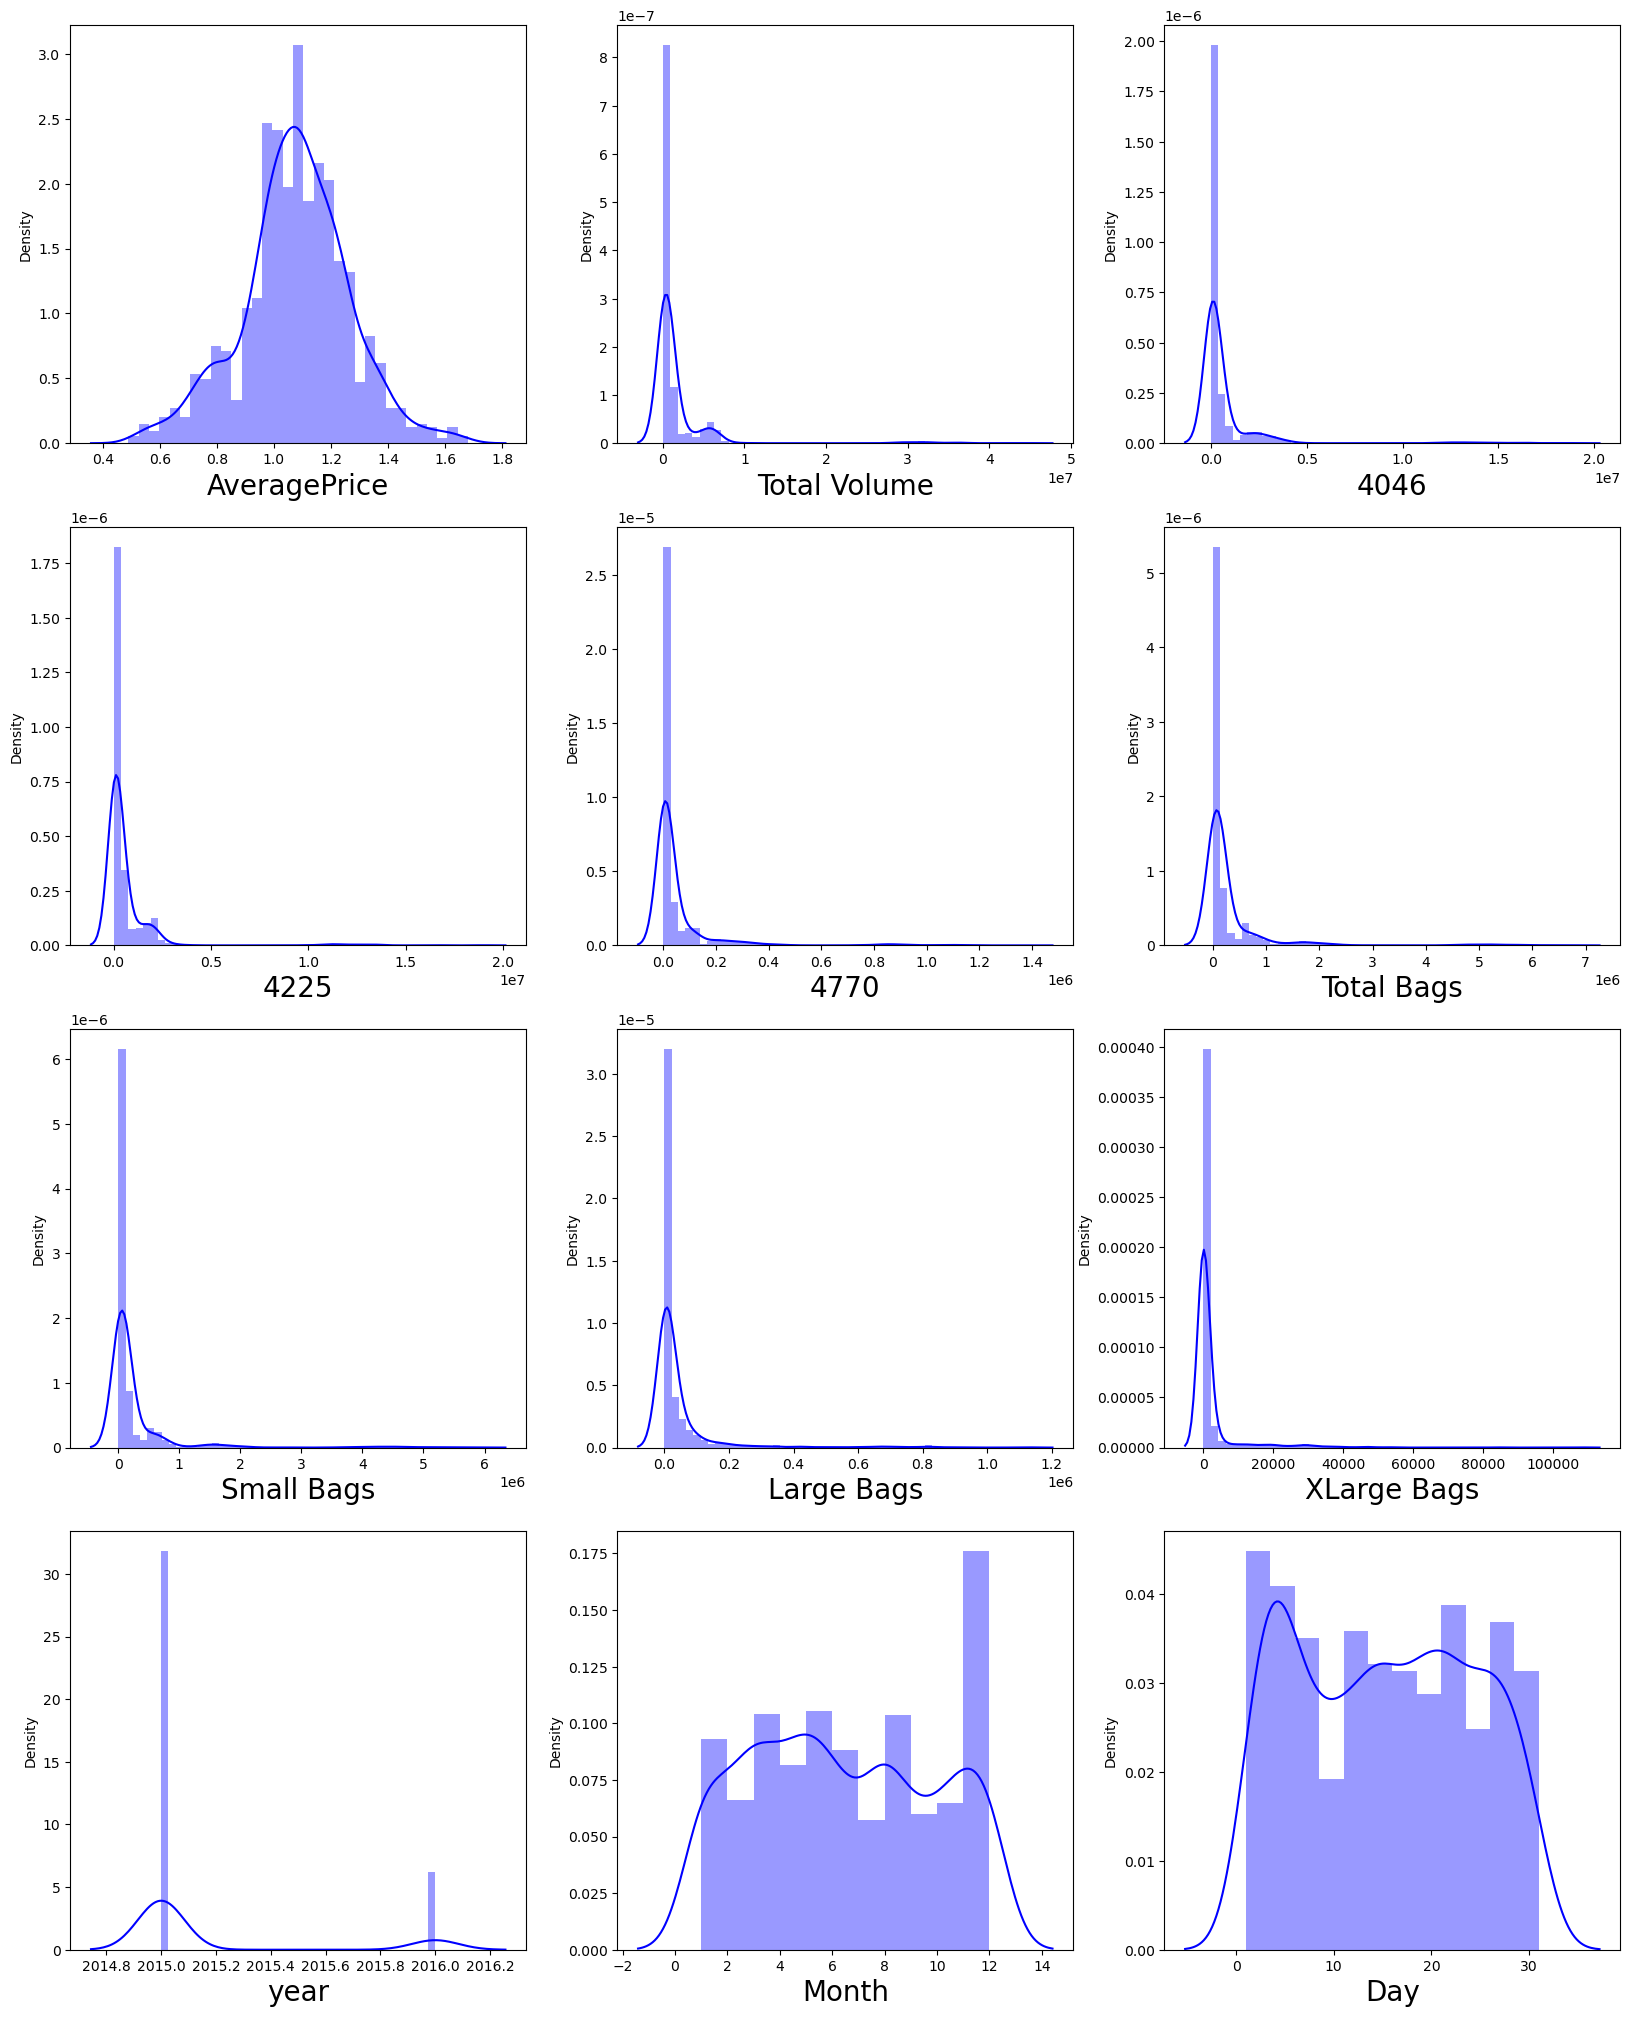

In [331]:
# for checking the skewness using distplot

plt.figure(figsize=(20, 25), facecolor='white')

plotnumber = 1

for column in numerical_col:
    if plotnumber <= 14:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column, fontsize = 20)
        plotnumber+=1
        
plt.show()

'''' we found the skewness in TotalVolume,4046,4225,4770,Total Bags, Small Bags, Large Bags, Xlarge '''

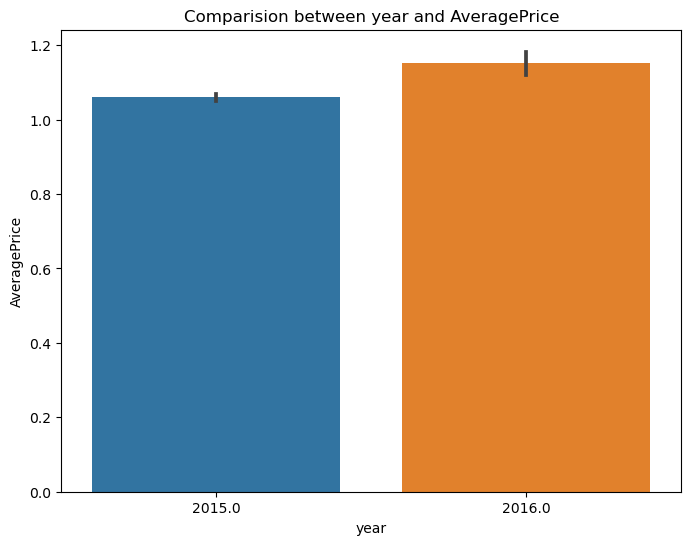

In [332]:
# Checking which year has maximum AveragePrice

plt.figure(figsize = [8, 6])

plt.title('Comparision between year and AveragePrice')

sns.barplot(x=df['year'], y=df['AveragePrice'], data = df);

plt.xlabel('year')

plt.ylabel('AveragePrice')
plt.show()

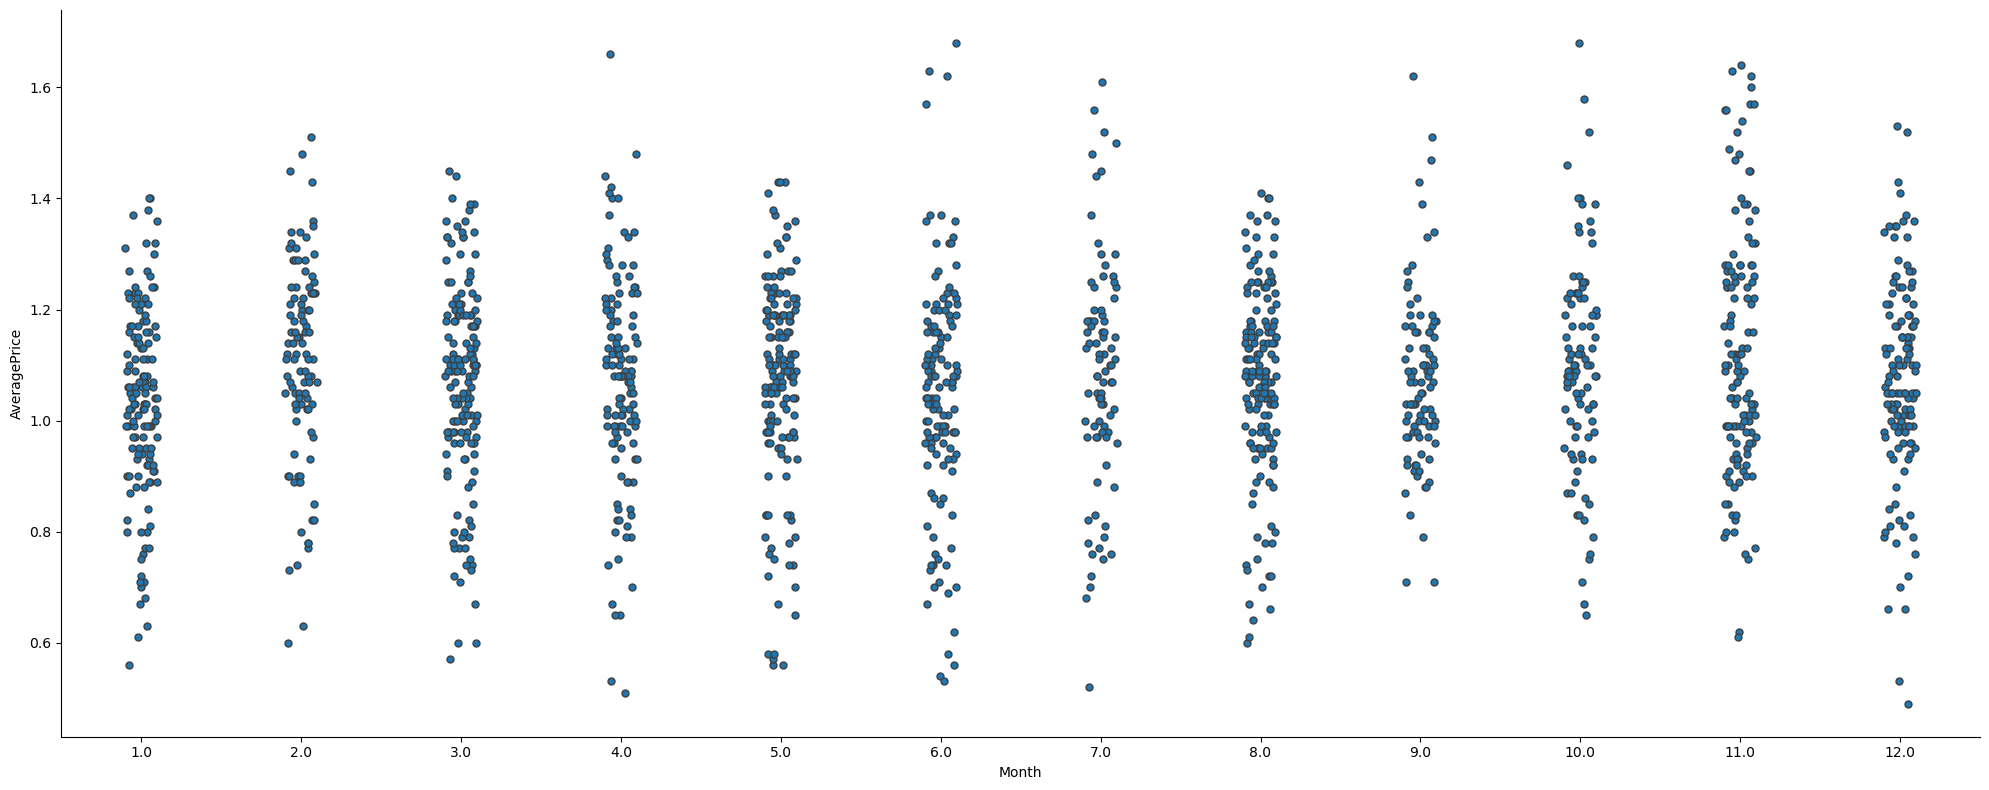

In [333]:
sns.catplot(x = 'Month', y = 'AveragePrice', kind = 'strip', data = df, height = 8, linewidth = 1, aspect = 2.5)

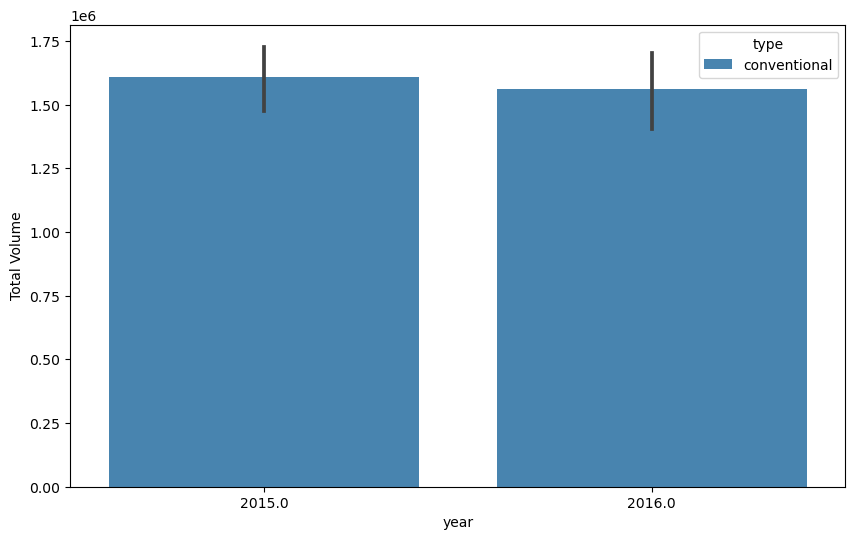

In [334]:
plt.figure(figsize = (10, 6))

sns.barplot(x = 'year', y = 'Total Volume', hue = 'type', data = df, palette = 'Blues_d', ci = 68)

plt.show()

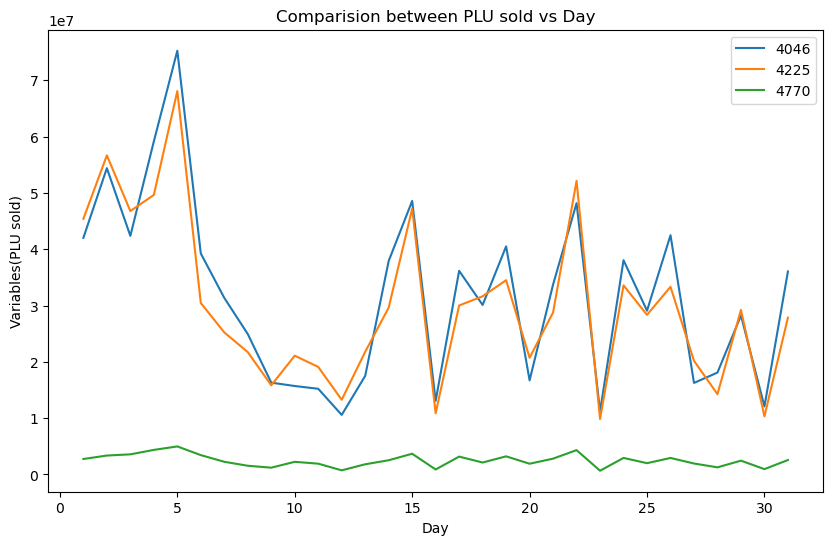

In [335]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()

variables.plot(kind = 'line', fontsize = 10, figsize = (10, 6))

plt.title('Comparision between PLU sold vs Day')

plt.xlabel('Day')

plt.ylabel('Variables(PLU sold)')

plt.show()

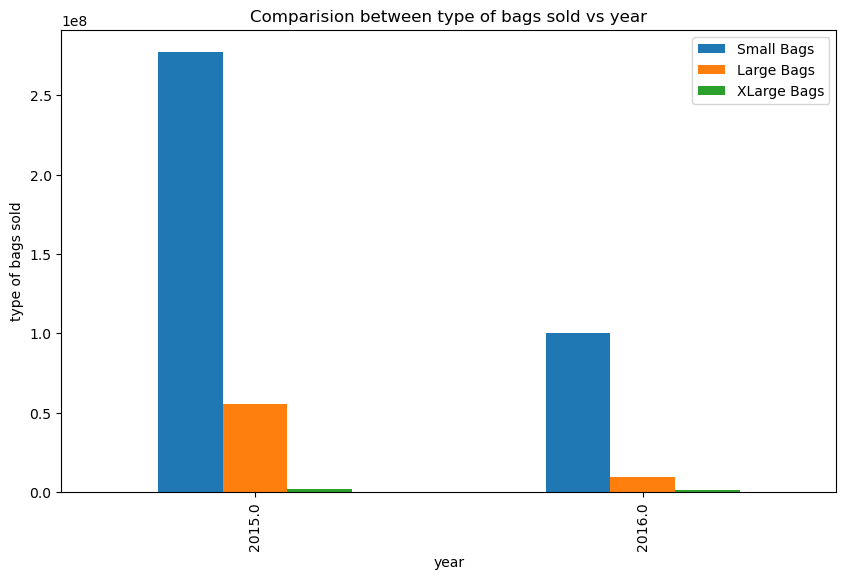

In [336]:
feature = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df.year).sum()

feature.plot(kind = 'bar', fontsize = 10, figsize = (10, 6))

plt.title('Comparision between type of bags sold vs year')

plt.xlabel('year')

plt.ylabel('type of bags sold')

plt.show()

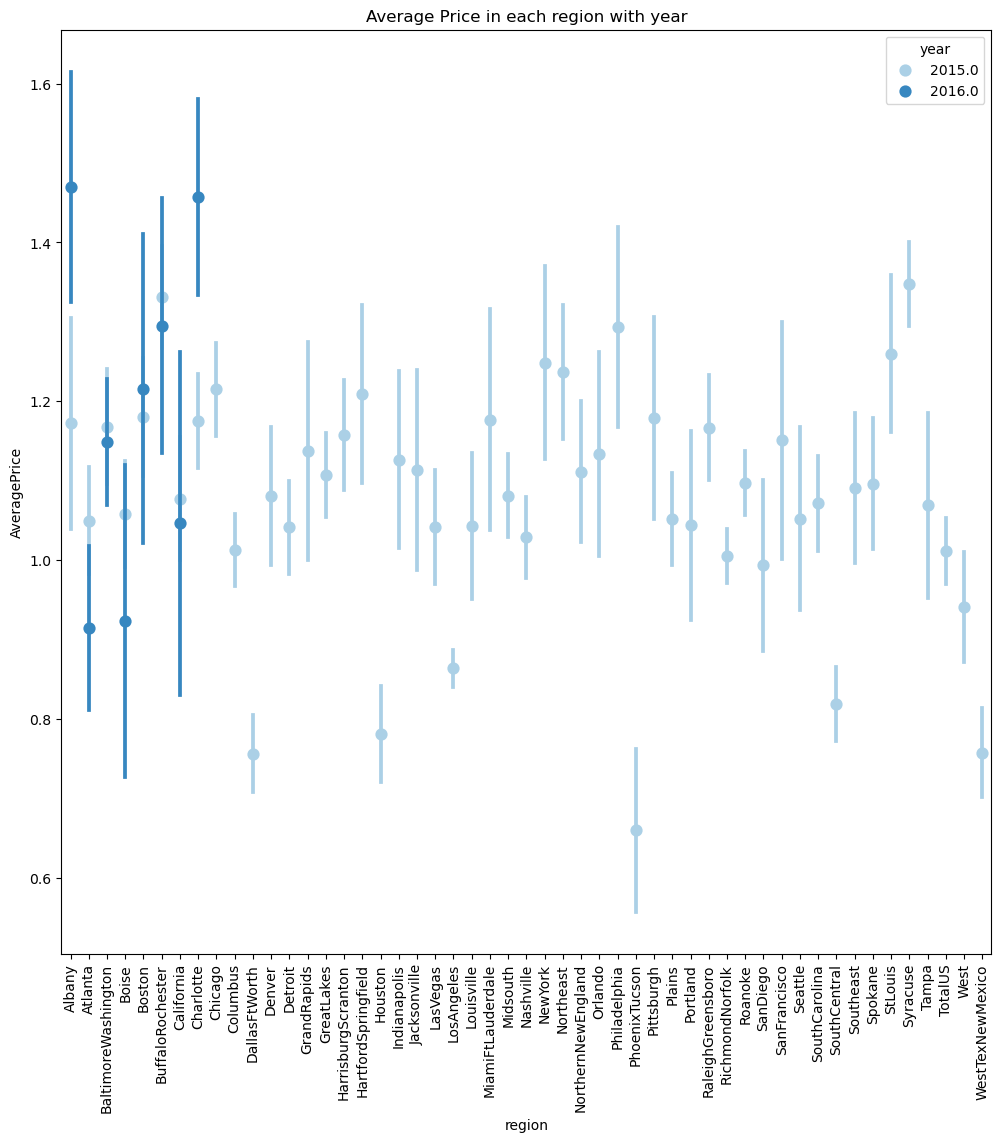

In [337]:
plt.figure(figsize = (12, 12))

plt.title('Average Price in each region with year')

sns.pointplot(x = 'region', y = 'AveragePrice', data = df, hue = 'year', join = False, palette = 'Blues', ci = 'sd')

plt.xticks(rotation = 90)

plt.show()

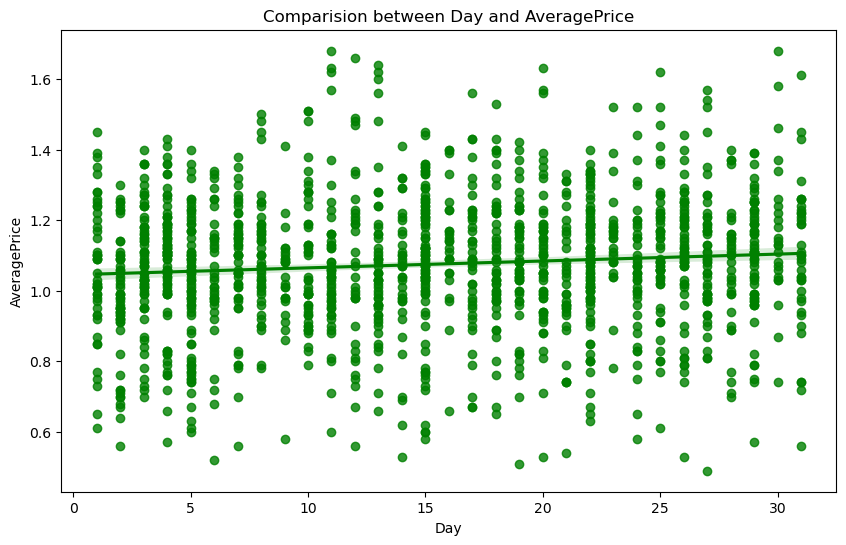

In [338]:
plt.figure(figsize = [10, 6])

plt.title('Comparision between Day and AveragePrice')

sns.regplot(x=df['Day'], y=df['AveragePrice'],data=df, color = 'g');

plt.show()

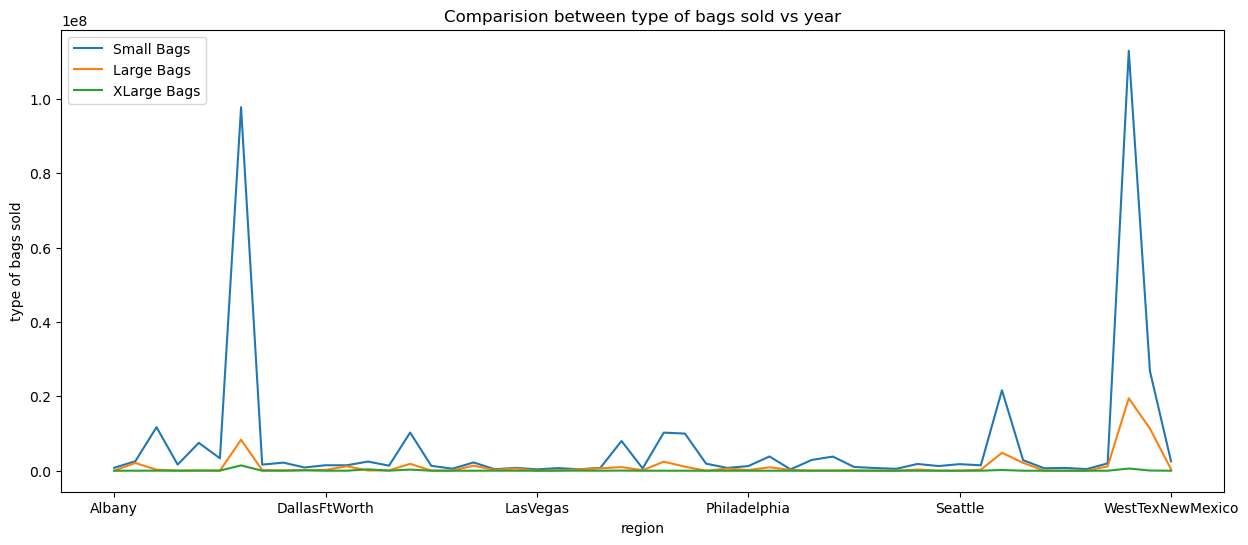

In [339]:
feature = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df.region).sum()

feature.plot(kind = 'line', fontsize = 10, figsize = (15, 6))

plt.title('Comparision between type of bags sold vs year')

plt.xlabel('region')

plt.ylabel('type of bags sold')

plt.show()

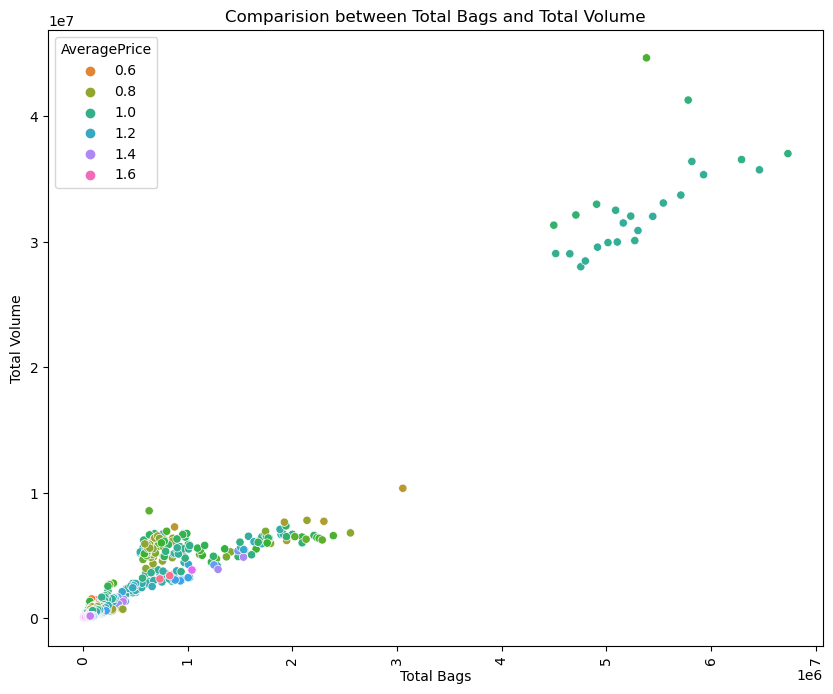

In [340]:
plt.figure(figsize = (10, 8))

plt.title('Comparision between Total Bags and Total Volume')

sns.scatterplot(x = 'Total Bags', y = 'Total Volume', hue = 'AveragePrice', data = df, palette = 'husl')

plt.xticks(rotation = 90)

plt.show()

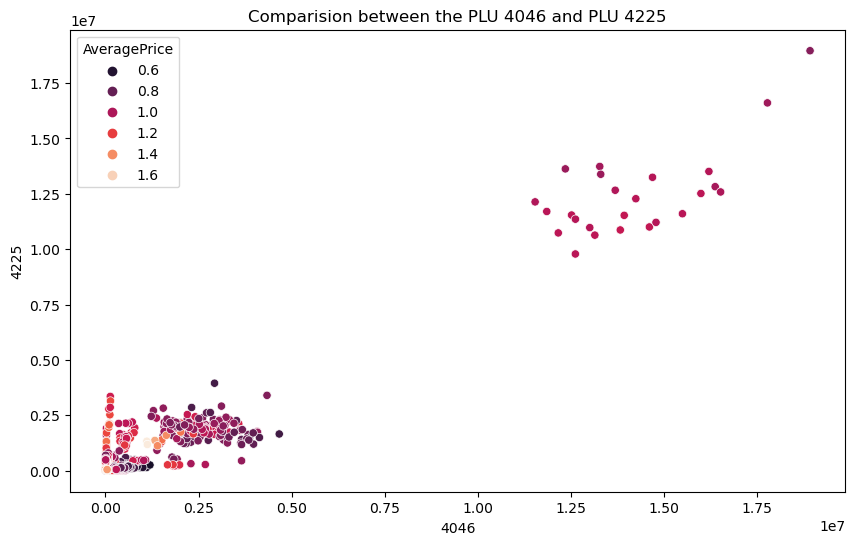

In [341]:
plt.figure(figsize = (10, 6))

plt.title('Comparision between the PLU 4046 and PLU 4225')

sns.scatterplot(x=df['4046'], y=df['4225'], hue = df['AveragePrice'], palette = 'rocket')

plt.show()

Multivariate Analysis

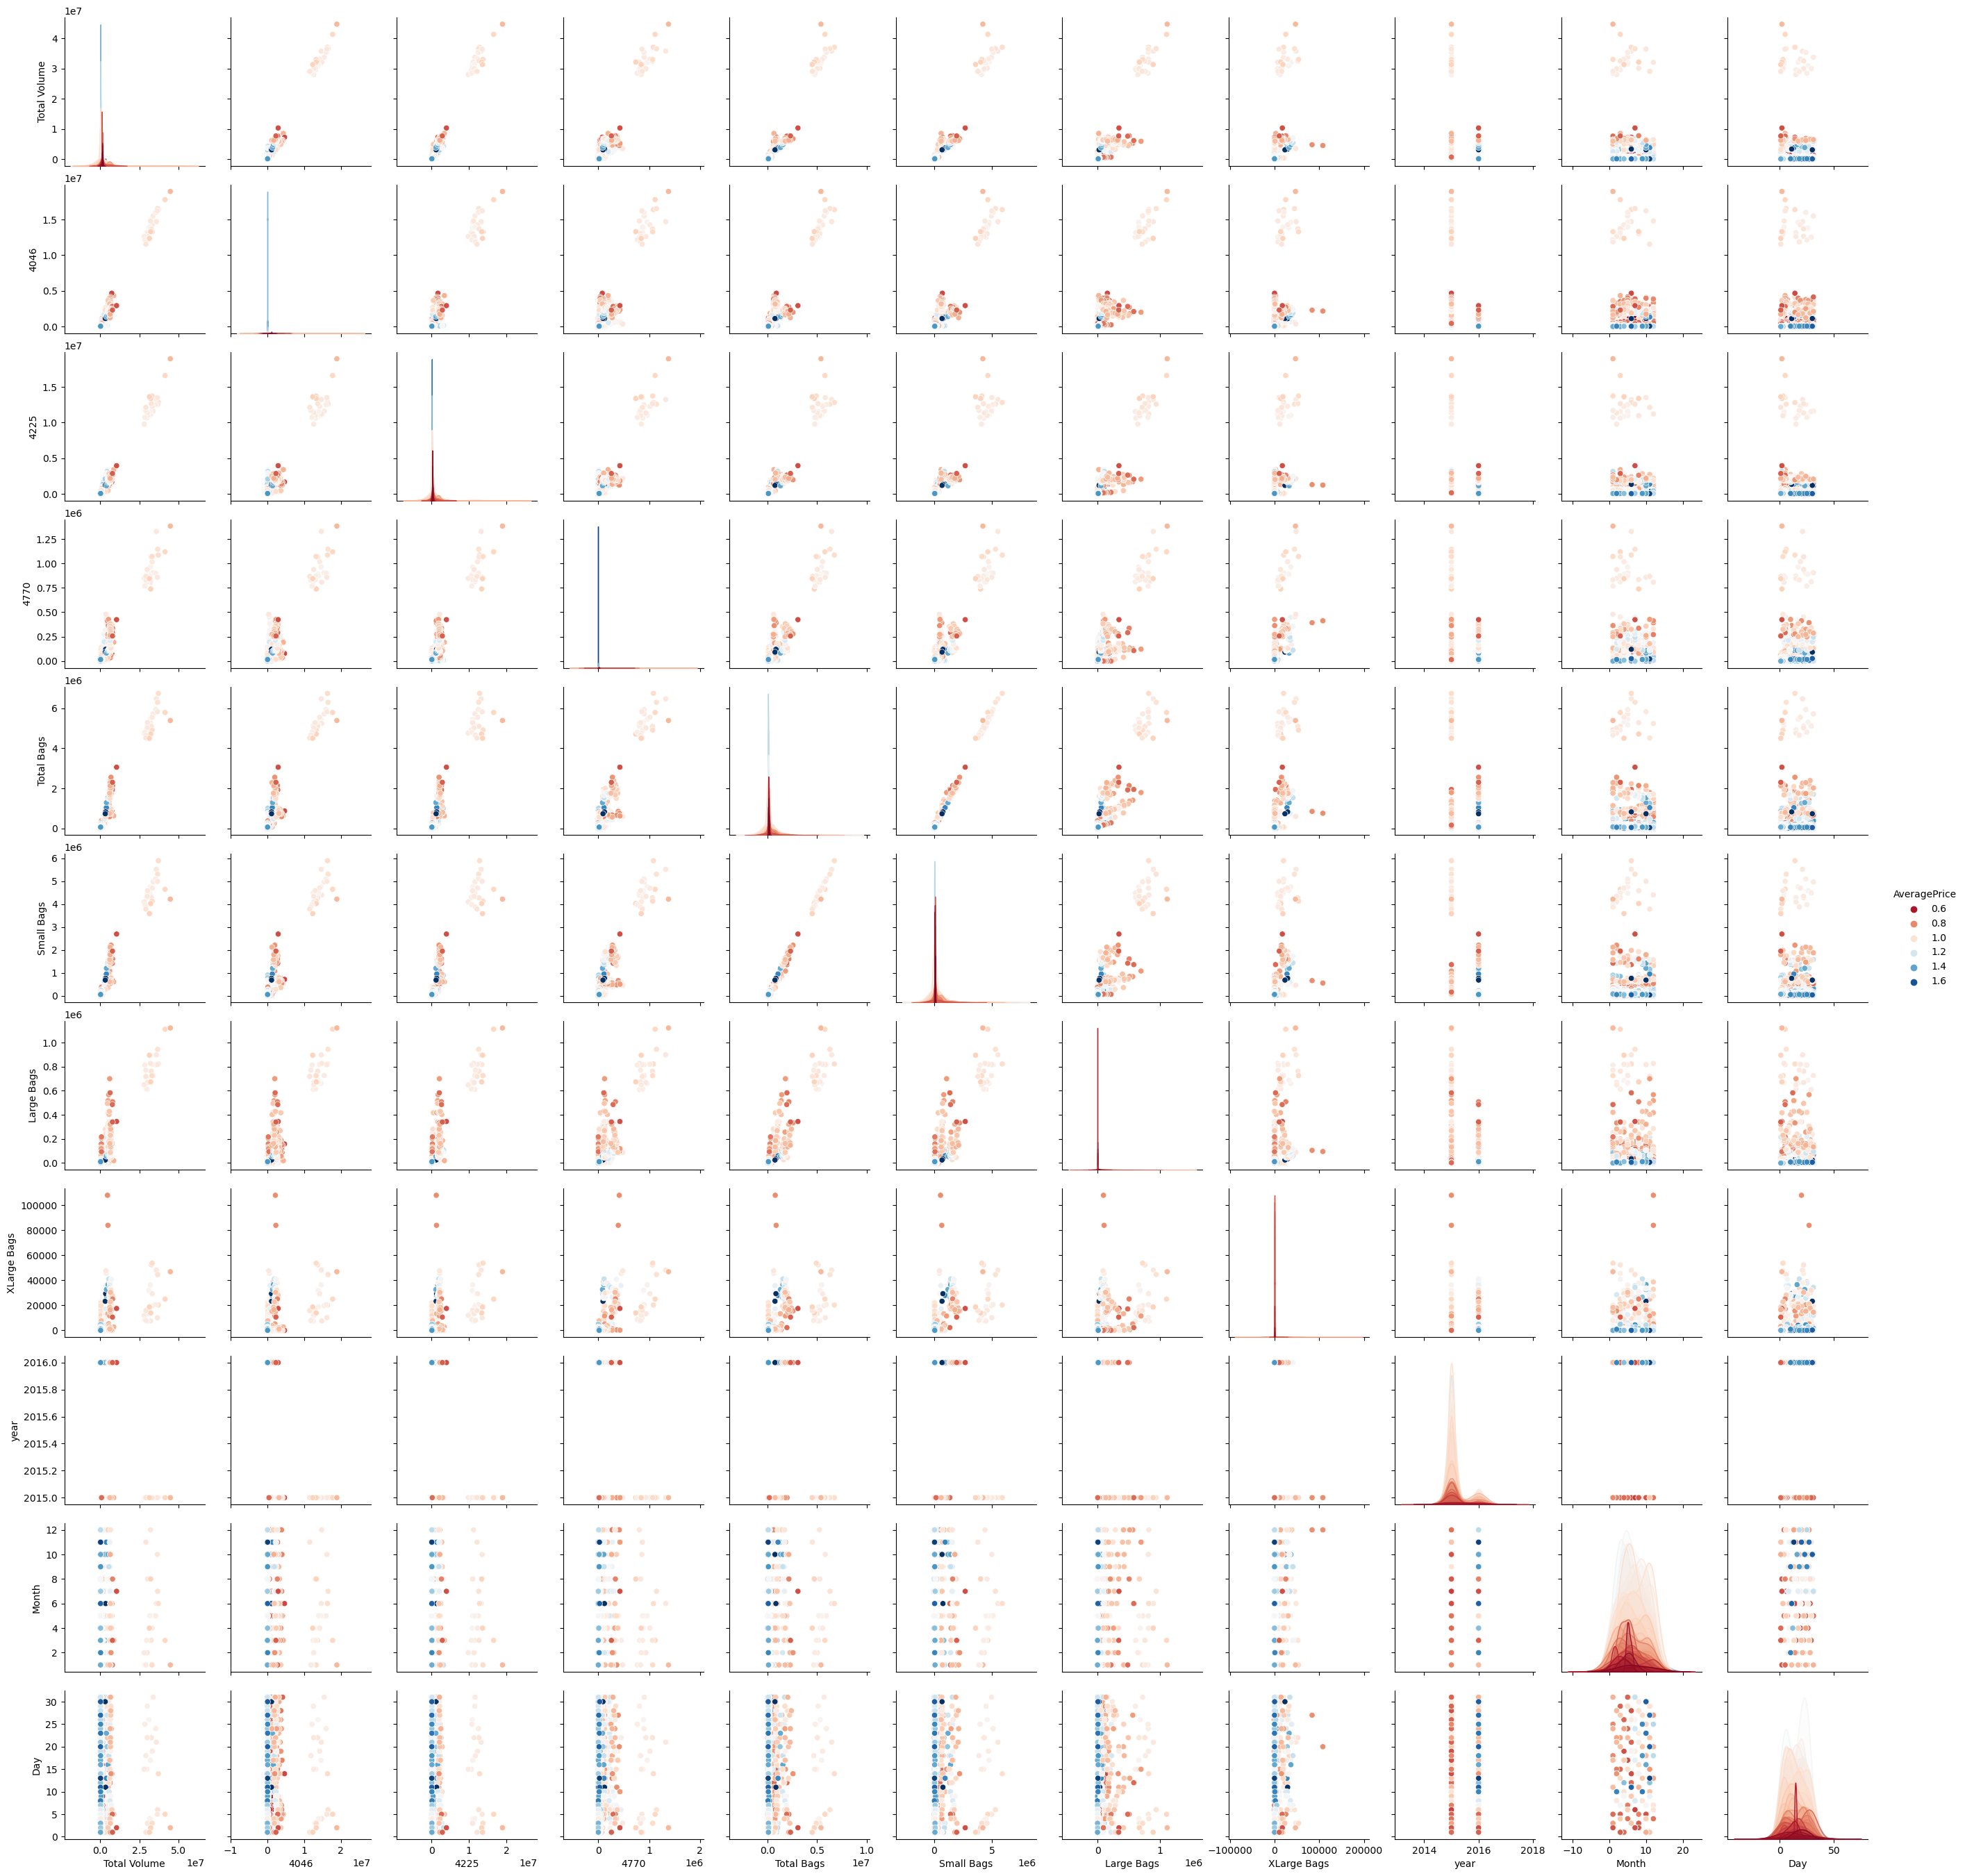

In [342]:
sns.pairplot(df, hue = 'AveragePrice', palette = 'RdBu')

<AxesSubplot: >

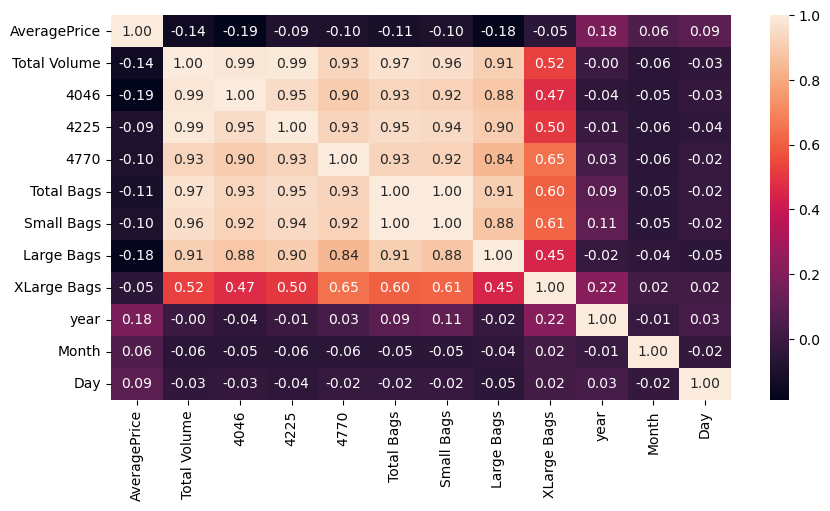

In [343]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

Removing the OUTLIERS

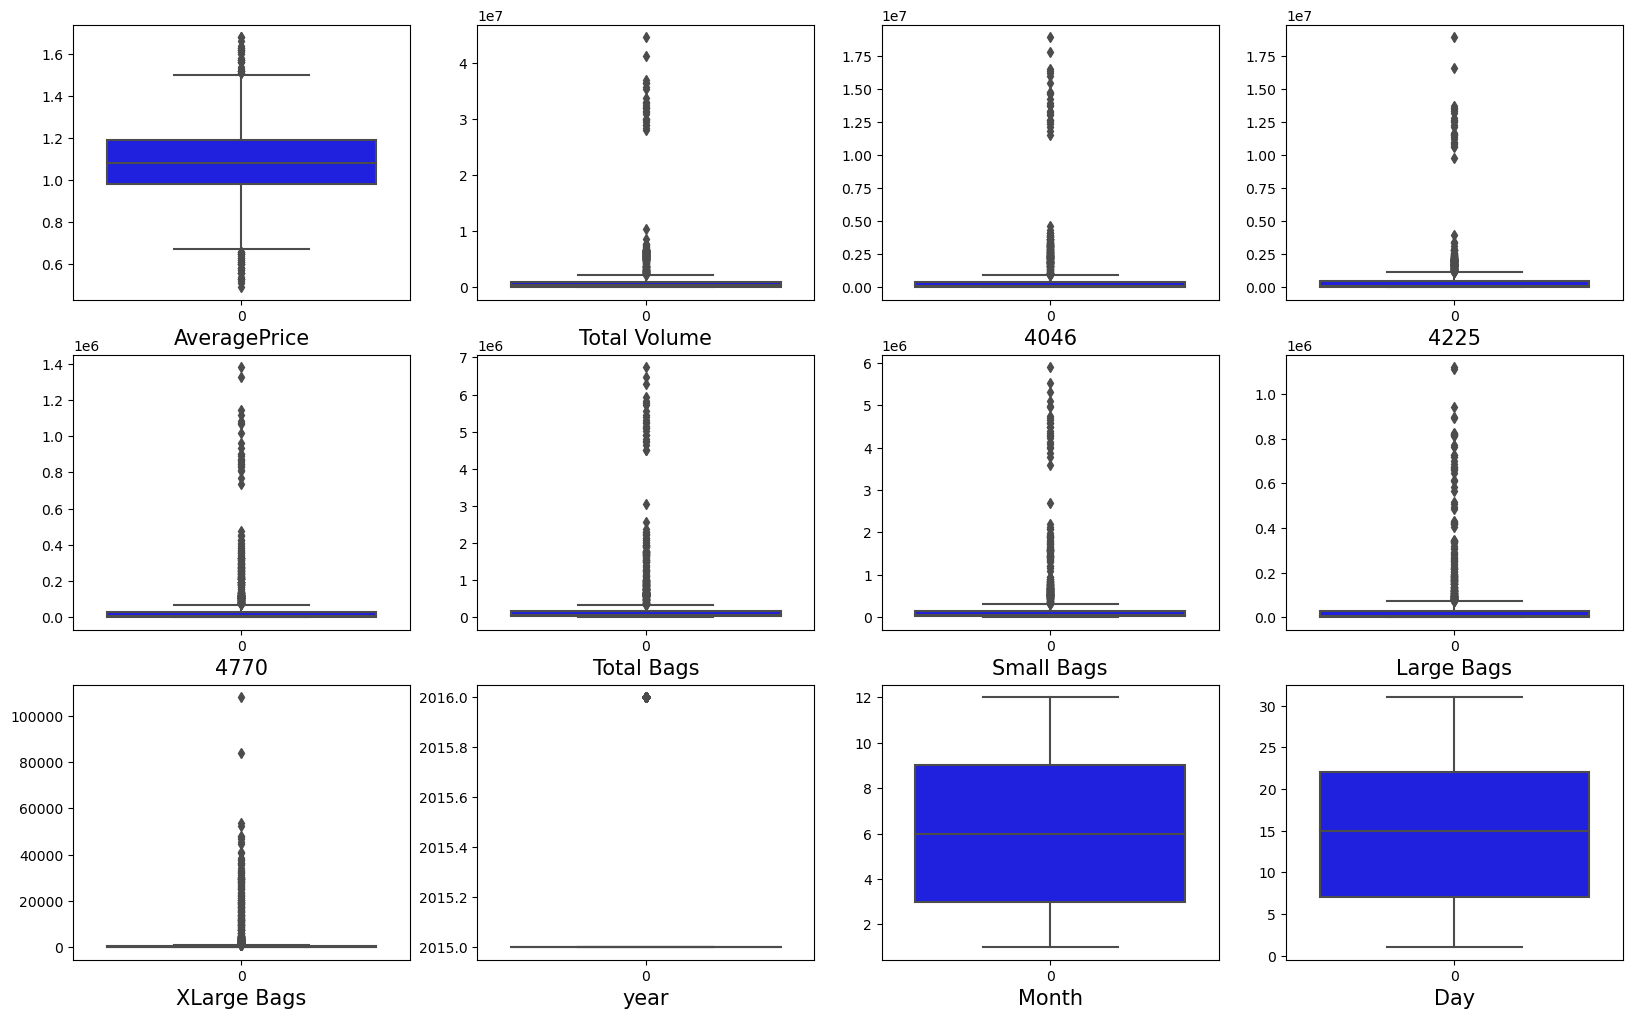

In [344]:
numerical_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']

plt.figure(figsize = (20, 25), facecolor = 'white')

plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6, 4, plotnumber)
        sns.boxplot(df[column], color = 'b')
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1

plt.show()

''' we found the outliers in many columns- 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags''''

Removing Outliers
Z Score Method

In [345]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [346]:
# Features containing outliers

F_S = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [347]:
z = np.abs(zscore(F_S))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.346966,0.331490,0.333053,0.365608,0.375994,0.371055,0.360044,0.292727
1,0.349078,0.331676,0.338923,0.365534,0.374927,0.369812,0.360008,0.292727
2,0.334785,0.331614,0.300348,0.365010,0.376722,0.371922,0.359960,0.292727
3,0.343636,0.331441,0.322576,0.365431,0.379802,0.375576,0.359701,0.292727
4,0.349944,0.331539,0.339401,0.365408,0.379310,0.375098,0.359160,0.292727
...,...,...,...,...,...,...,...,...
1512,0.318397,0.302475,0.331910,0.238672,0.309055,0.308916,0.273213,0.260489
1513,0.321242,0.309770,0.334407,0.224966,0.303931,0.299831,0.288090,0.292727
1514,0.321203,0.308209,0.333987,0.244443,0.305099,0.301950,0.290953,0.182037
1515,0.318784,0.304230,0.333568,0.238936,0.303098,0.298364,0.290783,0.292727


In [348]:
# Create new dataframe having Z<3

new_df = df[(z < 3).all(axis = 1)] 

new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,6.0,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,10.0,16.0
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,9.0,10.0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,2.0,10.0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,9.0,25.0


In [349]:
df.shape

(1517, 14)

In [350]:
new_df.shape

(1439, 14)

In [357]:
# Checking the skewness

new_df.skew()

AveragePrice   -0.164097
Total Volume    2.699607
4046            3.117671
4225            2.364213
4770            3.329694
Total Bags      4.153979
Small Bags      4.394953
Large Bags      3.521463
XLarge Bags     5.107058
year            1.992181
Month           0.110961
Day             0.040894
dtype: float64

'''There is skewness in above columns'''


Removing the Skewness by using YEO-JOHNSON method

In [358]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
scaler = PowerTransformer(method = 'yeo-johnson')


'''''
parameters:

method = 'box-cox' or 'yeo-johnson'''

"''\nparameters:\n\nmethod = 'box-cox' or 'yeo-johnson"

In [359]:
new_df[features] = scaler.fit_transform(new_df[features].values)

new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-1.176494,-0.998901,-0.750412,-1.001931,-1.408740,-1.323518,-0.927840,-0.584018
1,-1.212407,-1.002240,-0.825700,-1.000807,-1.388959,-1.301207,-0.927312,-0.584018
2,-0.976218,-1.001131,-0.364484,-0.992836,-1.422289,-1.339166,-0.926609,-0.584018
3,-1.120597,-0.998024,-0.620662,-0.999231,-1.480152,-1.405795,-0.922804,-0.584018
4,-1.227234,-0.999779,-0.831923,-0.998878,-1.470854,-1.397027,-0.914872,-0.584018


In [360]:
new_df.skew()

AveragePrice   -0.164097
Total Volume    0.558944
4046            0.813278
4225            0.593728
4770            0.734930
Total Bags      0.549315
Small Bags      0.567917
Large Bags      0.753365
XLarge Bags     1.420575
year            1.992181
Month           0.110961
Day             0.040894
dtype: float64

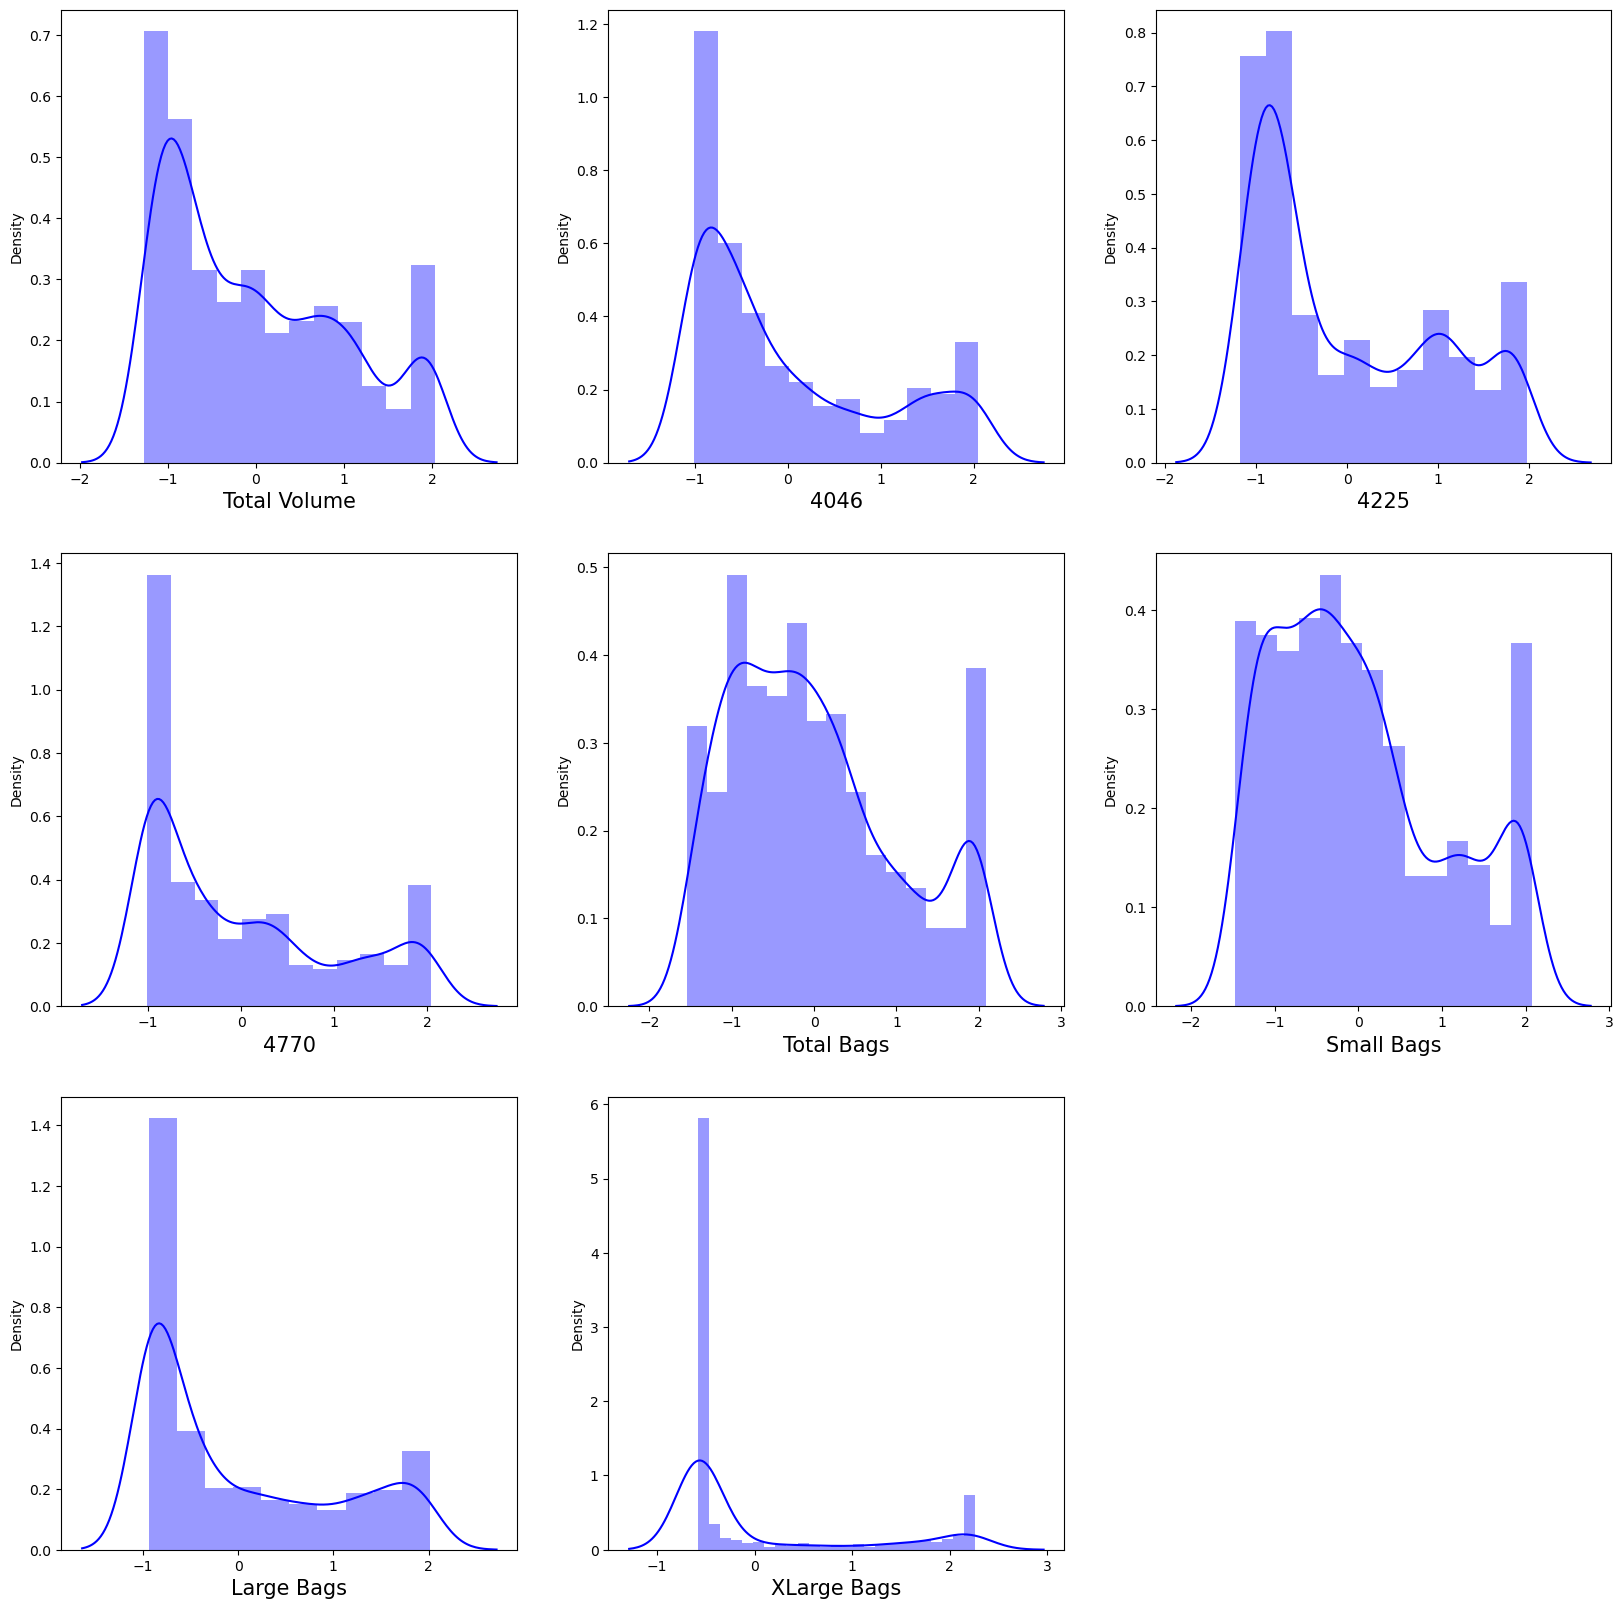

In [362]:
plt.figure(figsize=(20, 20), facecolor = 'white')

plotnumber = 1

for column in new_df[features]:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(new_df[column], color = 'b')
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1

plt.show()

Encode the catagorical data using label encoder.

In [363]:
# Columns with catagorical data

categorical_col = ["type","region"]

In [364]:
LE = LabelEncoder()

new_df[categorical_col] = new_df[categorical_col].apply(LE.fit_transform)

new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1512,0,7
1513,0,7
1514,0,7
1515,0,7


Corelation between target and independent variables

In [365]:
corr = new_df.corr()

corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.356164,-0.589779,-0.129208,-0.174926,-0.173966,-0.118278,-0.272936,-0.019670,NaN,0.182109,-0.214139,0.062677,0.090781
Total Volume,-0.356164,1.000000,0.743962,0.897680,0.568161,0.908231,0.879541,0.638116,0.206500,NaN,-0.081080,0.148843,-0.086665,-0.048531
4046,-0.589779,0.743962,1.000000,0.428935,0.420310,0.569700,0.501710,0.610244,0.153183,NaN,-0.199246,0.303030,-0.078442,-0.039912
4225,-0.129208,0.897680,0.428935,1.000000,0.540547,0.853809,0.863202,0.471902,0.207484,NaN,-0.001188,0.025512,-0.053229,-0.037205
4770,-0.174926,0.568161,0.420310,0.540547,1.000000,0.548660,0.586273,0.182213,0.513416,NaN,-0.004338,-0.022747,-0.026674,0.010469
Total Bags,-0.173966,0.908231,0.569700,0.853809,0.548660,1.000000,0.976252,0.634831,0.264879,NaN,0.057119,0.090817,-0.067710,-0.030408
Small Bags,-0.118278,0.879541,0.501710,0.863202,0.586273,0.976252,1.000000,0.485671,0.265193,NaN,0.087563,0.079885,-0.066053,-0.019501
Large Bags,-0.272936,0.638116,0.610244,0.471902,0.182213,0.634831,0.485671,1.000000,0.086338,NaN,-0.154282,0.202797,-0.031008,-0.027466
XLarge Bags,-0.019670,0.206500,0.153183,0.207484,0.513416,0.264879,0.265193,0.086338,1.000000,NaN,0.086820,-0.220495,0.040945,0.027818
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month'),
  Text(0, 13.5, 'Day')])

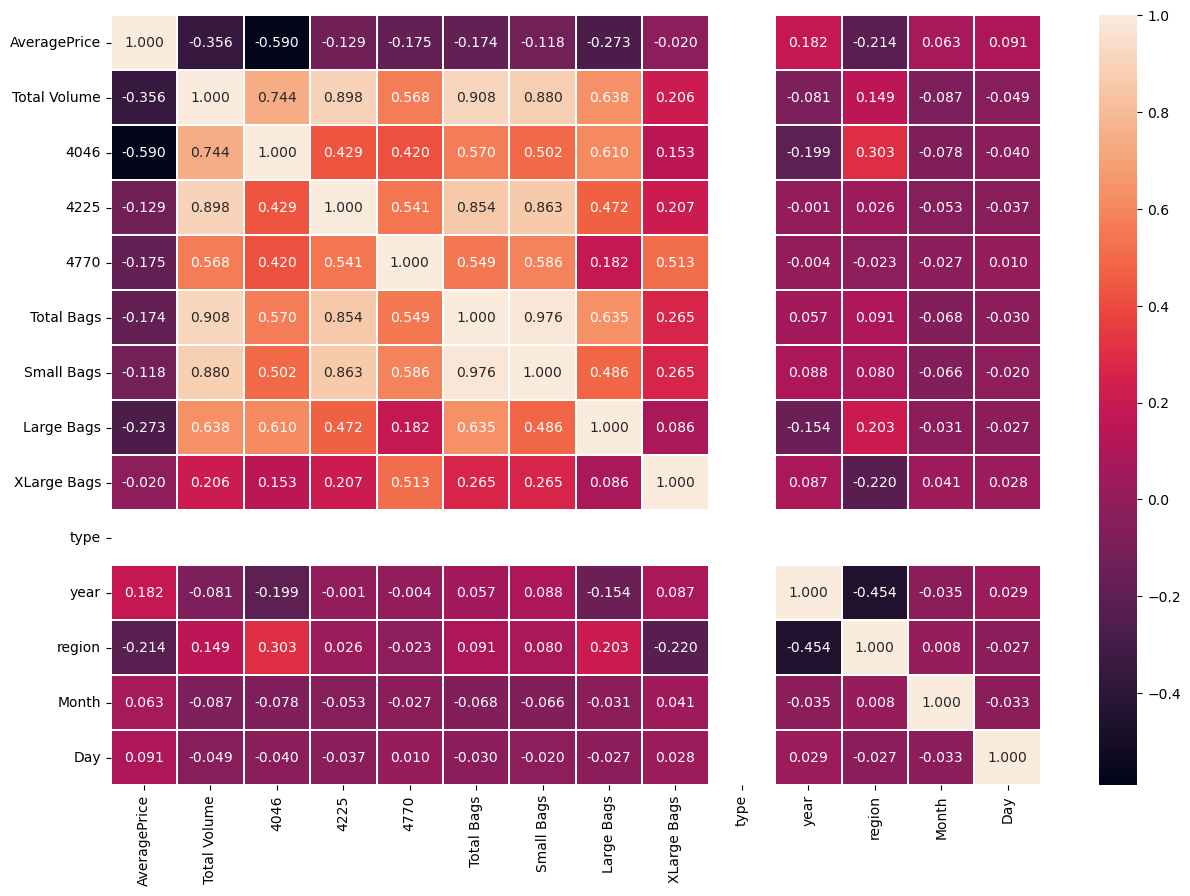

In [366]:
plt.figure(figsize = (15, 10))

sns.heatmap(new_df.corr(), linewidths = 0.2, fmt = '0.3f', annot = True)

plt.yticks(rotation = 0)

using VIF for solving Multi colinearity problem.

In [367]:
corr['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
year            0.182109
Day             0.090781
Month           0.062677
XLarge Bags    -0.019670
Small Bags     -0.118278
4225           -0.129208
Total Bags     -0.173966
4770           -0.174926
region         -0.214139
Large Bags     -0.272936
Total Volume   -0.356164
4046           -0.589779
type                 NaN
Name: AveragePrice, dtype: float64

Visualization of corelation between label and features.

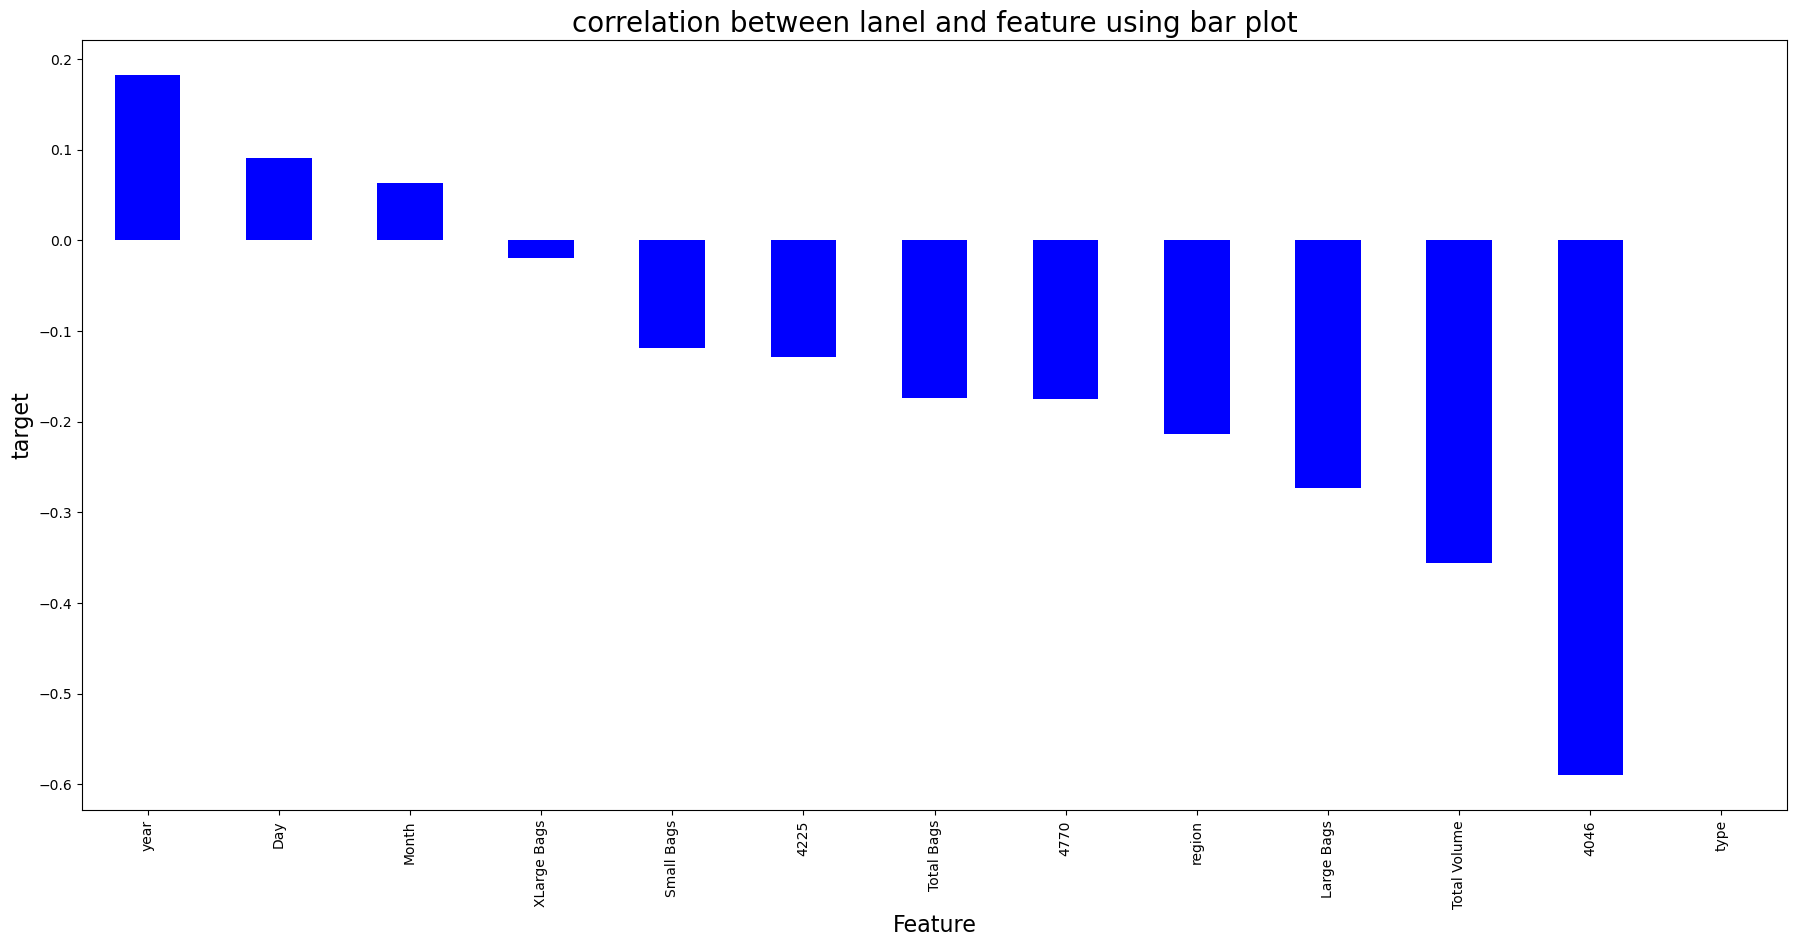

In [368]:
plt.figure(figsize = (22, 10))

new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind = 'bar', color = 'b')

plt.xlabel('Feature',fontsize = 16)

plt.ylabel('target',fontsize = 16)

plt.title('correlation between lanel and feature using bar plot', fontsize = 20)

plt.show()

In [369]:
new_df.drop('Day', axis = 1, inplace = True)

Regression model

In [370]:
# seperate features in x & y labels

x = new_df.drop('AveragePrice', axis = 1)

y = new_df['AveragePrice']

In [371]:
x.shape

(1439, 12)

In [372]:
y.shape

(1439,)

In [373]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-1.176494,-0.998901,-0.750412,-1.001931,-1.408740,-1.323518,-0.927840,-0.584018,0,2015.0,0,12.0
1,-1.212407,-1.002240,-0.825700,-1.000807,-1.388959,-1.301207,-0.927312,-0.584018,0,2015.0,0,12.0
2,-0.976218,-1.001131,-0.364484,-0.992836,-1.422289,-1.339166,-0.926609,-0.584018,0,2015.0,0,12.0
3,-1.120597,-0.998024,-0.620662,-0.999231,-1.480152,-1.405795,-0.922804,-0.584018,0,2015.0,0,6.0
4,-1.227234,-0.999779,-0.831923,-0.998878,-1.470854,-1.397027,-0.914872,-0.584018,0,2015.0,0,11.0


Standard scalarization

In [375]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-1.176494,-0.998901,-0.750412,-1.001931,-1.408740,-1.323518,-0.927840,-0.584018,0.0,-0.415667,-1.325366,1.634888
1,-1.212407,-1.002240,-0.825700,-1.000807,-1.388959,-1.301207,-0.927312,-0.584018,0.0,-0.415667,-1.325366,1.634888
2,-0.976218,-1.001131,-0.364484,-0.992836,-1.422289,-1.339166,-0.926609,-0.584018,0.0,-0.415667,-1.325366,1.634888
3,-1.120597,-0.998024,-0.620662,-0.999231,-1.480152,-1.405795,-0.922804,-0.584018,0.0,-0.415667,-1.325366,-0.097941
4,-1.227234,-0.999779,-0.831923,-0.998878,-1.470854,-1.397027,-0.914872,-0.584018,0.0,-0.415667,-1.325366,1.346083
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,-0.724689,-0.517316,-0.735967,0.442750,-0.349661,-0.360065,0.117502,0.252104,0.0,2.405771,-0.879922,1.057278
1435,-0.766925,-0.631328,-0.767619,0.548565,-0.282698,-0.243321,-0.031149,-0.584018,0.0,2.405771,-0.879922,0.768473
1436,-0.766335,-0.606547,-0.762262,0.395670,-0.297799,-0.270040,-0.061100,1.401772,0.0,2.405771,-0.879922,-1.253160
1437,-0.730397,-0.544336,-0.756942,0.440629,-0.271988,-0.225006,-0.059309,-0.584018,0.0,2.405771,-0.879922,0.768473


In [376]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,44.694648,Total Volume
1,8.481841,4046
2,16.595700,4225
3,2.259154,4770
4,86.707237,Total Bags
5,67.263894,Small Bags
6,5.403230,Large Bags
7,1.550779,XLarge Bags
8,NaN,type
9,1.444202,year


In [377]:

# Drop column Total volume

x.drop('Total Volume', axis = 1, inplace = True)

In [378]:
# check again the VIF values

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,2.135255,4046
1,4.339763,4225
2,2.258825,4770
3,81.437193,Total Bags
4,66.988568,Small Bags
5,5.389923,Large Bags
6,1.506878,XLarge Bags
7,NaN,type
8,1.411222,year
9,1.529482,region


In [379]:
# Still 2 columns have VIF more than 10 so lets drop another column Total bags

x.drop('Total Bags', axis = 1, inplace = True)

In [380]:
# check VIF values again

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,2.111480,4046
1,4.338829,4225
2,2.231148,4770
3,5.079968,Small Bags
4,1.934030,Large Bags
5,1.482622,XLarge Bags
6,NaN,type
7,1.409074,year
8,1.496475,region
9,1.015681,Month


Now the VIF values have reduced within 10, this means Multicolinearity has been solved, lets start building model.
Finding Best Random State

In [381]:
maxAcc = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
print('Maximum R2 score is ', maxAcc,' on Random_state ', maxRS)

Maximum R2 score is  0.7657909247326593  on Random_state  17


we got a max R2 score of 87 % at Random state of 49

In [382]:

# create Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)

Linear regression with Cross_validation score

In [383]:

# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train, y_train)

# predict
predLR = LR.predict(x_test)
print('R2_score:', r2_score(y_test, predLR))
print('MAE:', metrics.mean_absolute_error(y_test, predLR))
print('MSE:', metrics.mean_squared_error(y_test, predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking Cross_Validation score for Linear Regression
print('Cross_Validaton_Score', cross_val_score(LR, x, y, cv = 5).mean())

R2_score: 0.39708745457422756
MAE: 0.11685310696718736
MSE: 0.02320458496181698
RMSE: 0.152330512248259
Cross_Validaton_Score 0.024970828786535802


Random Forest Regressor

In [384]:
# Checking R2 score for  Random Forest Regressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

# predict
pred_RFR = RFR.predict(x_test)
print('R2_Score:', r2_score(y_test, pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:', metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking Cross_Validation score for Random Forest Regression
print('Cross_Validaton_Score', cross_val_score(RFR, x, y, cv = 5).mean())

R2_Score: 0.7933948719696512
MAE: 0.06204305555555555
MSE: 0.007951710879629623
RMSE: 0.08917236612106703
Cross_Validaton_Score 0.1713326846146955


KNeighbors Regressor

In [385]:
# Checking R2 score for KNN Regressor
knn = KNN()

knn.fit(x_train, y_train)

# predict

predknn = knn.predict(x_test)

print('R2_Score:',r2_score(y_test, predknn))

print('MAE:',metrics.mean_absolute_error(y_test, predknn))

print('MSE:',metrics.mean_squared_error(y_test, predknn))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking Cross_Validaton score for KNN
print('Cross_Validaton_Score', cross_val_score(knn, x, y, cv = 5).mean())

R2_Score: 0.6887316352168791
MAE: 0.07693981481481481
MSE: 0.011979935185185184
RMSE: 0.10945289025505532
Cross_Validaton_Score 0.08680900721678779


Gradient Boosting Regressor

In [386]:
# Checking R2 score for  GradientBoosting Regressor

GB = GradientBoostingRegressor()

GB.fit(x_train, y_train)

# predict

predGB = GB.predict(x_test)

print('R2_Score:',metrics.r2_score(y_test,predGB))

print('MAE:',metrics.mean_absolute_error(y_test, predGB))

print('MSE:',metrics.mean_squared_error(y_test, predGB))

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking Cross_Validaton score for GradientBoosting Regressor
print('Cross_Validaton_Score', cross_val_score(GB, x, y, cv = 5).mean())

R2_Score: 0.7169689903221461
MAE: 0.07762239631784727
MSE: 0.010893150525273279
RMSE:  0.10437025689952707
Cross_Validaton_Score 0.14043013519290043


SVM regressor

In [387]:
# Checking R2 score for Support Vector Machine Regressor

svr = SVR()

svr.fit(x_train, y_train)

# predict

predsvr = svr.predict(x_test)

print('R2_Score:', r2_score(y_test, predsvr))

print('MAE:', metrics.mean_absolute_error(y_test, predsvr))

print('MSE:', metrics.mean_squared_error(y_test, predsvr))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 

print('Cross_Validaton_Score', cross_val_score(svr, x, y, cv = 5).mean())


R2_Score: 0.7163900240809749
MAE: 0.07940369402436201
MSE: 0.01091543347731203
RMSE: 0.10447695189520045
Cross_Validaton_Score 0.15851341340113875


Here we can conclude that KNN Regressor is best fit model for our results.
Hyper Parameter Tuning

In [388]:
parameter = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10, 20, 30, 40]}

In [389]:
GCV = GridSearchCV(KNN(), parameter, cv = 5)

In [390]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [391]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [392]:
MODEL_FINAL = KNN(algorithm = 'brute', n_jobs = 10, n_neighbors = 3, weights = 'distance')

MODEL_FINAL.fit(x_train, y_train)

pred = MODEL_FINAL.predict(x_test)

print('R2_Score:',r2_score(y_test, pred) * 100)

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 71.48326279354669
mean_squared_error: 0.010975373731419906
mean_absolute_error: 0.07088179982886646
RMSE value: 0.104763417906347


Saving model

In [393]:
# Save the model as .pkl

joblib.dump(MODEL_FINAL, 'Avocado.pkl')

['Avocado.pkl']

Predicting Saved Model

In [395]:
model=joblib.load('Avocado.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([1.21022982, 1.19172273, 1.09992038, 1.16006959, 0.99531099,
       1.11873961, 0.98340153, 1.08586704, 1.56475628, 1.28614096,
       1.2150275 , 0.89598125, 1.06000396, 1.1564114 , 1.31631967,
       1.05912589, 1.18927775, 1.1618614 , 1.07272523, 1.14315318,
       1.17756665, 1.29049932, 0.9944325 , 1.02564721, 1.06937057,
       1.19067881, 1.04847952, 1.19306912, 1.19950451, 1.12747408,
       0.8352896 , 1.5838268 , 1.25584366, 1.25514468, 1.10268967,
       0.76376946, 1.21953238, 0.78671627, 1.03126983, 1.33423793,
       1.07431626, 1.21039754, 1.0954777 , 0.97912576, 0.93289951,
       0.96894489, 1.09774946, 1.10126882, 1.11897561, 1.1033039 ,
       1.29647718, 1.03403952, 1.00817888, 1.24693243, 1.16471082,
       1.17786975, 1.01965731, 0.99595745, 1.22304781, 1.27952442,
       1.12550446, 0.61763015, 1.04366302, 1.09184706, 1.18084828,
       0.63860189, 1.13241055, 1.06864323, 1.24881853, 1.30177712,
       1.17908751, 0.78796333, 1.21512878, 1.15677935, 1.00416

In [396]:

pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
Predicted,1.21023,1.191723,1.09992,1.16007,0.995311,1.11874,0.983402,1.085867,1.564756,1.286141,...,1.148472,1.215019,1.154109,0.799431,1.22385,0.645745,1.211662,1.491514,1.111751,1.09622
Original,1.20000,1.170000,1.04000,1.02000,1.040000,1.12000,0.960000,1.110000,1.560000,1.270000,...,1.130000,1.240000,1.140000,0.830000,0.95000,0.710000,1.220000,1.610000,1.060000,1.10000


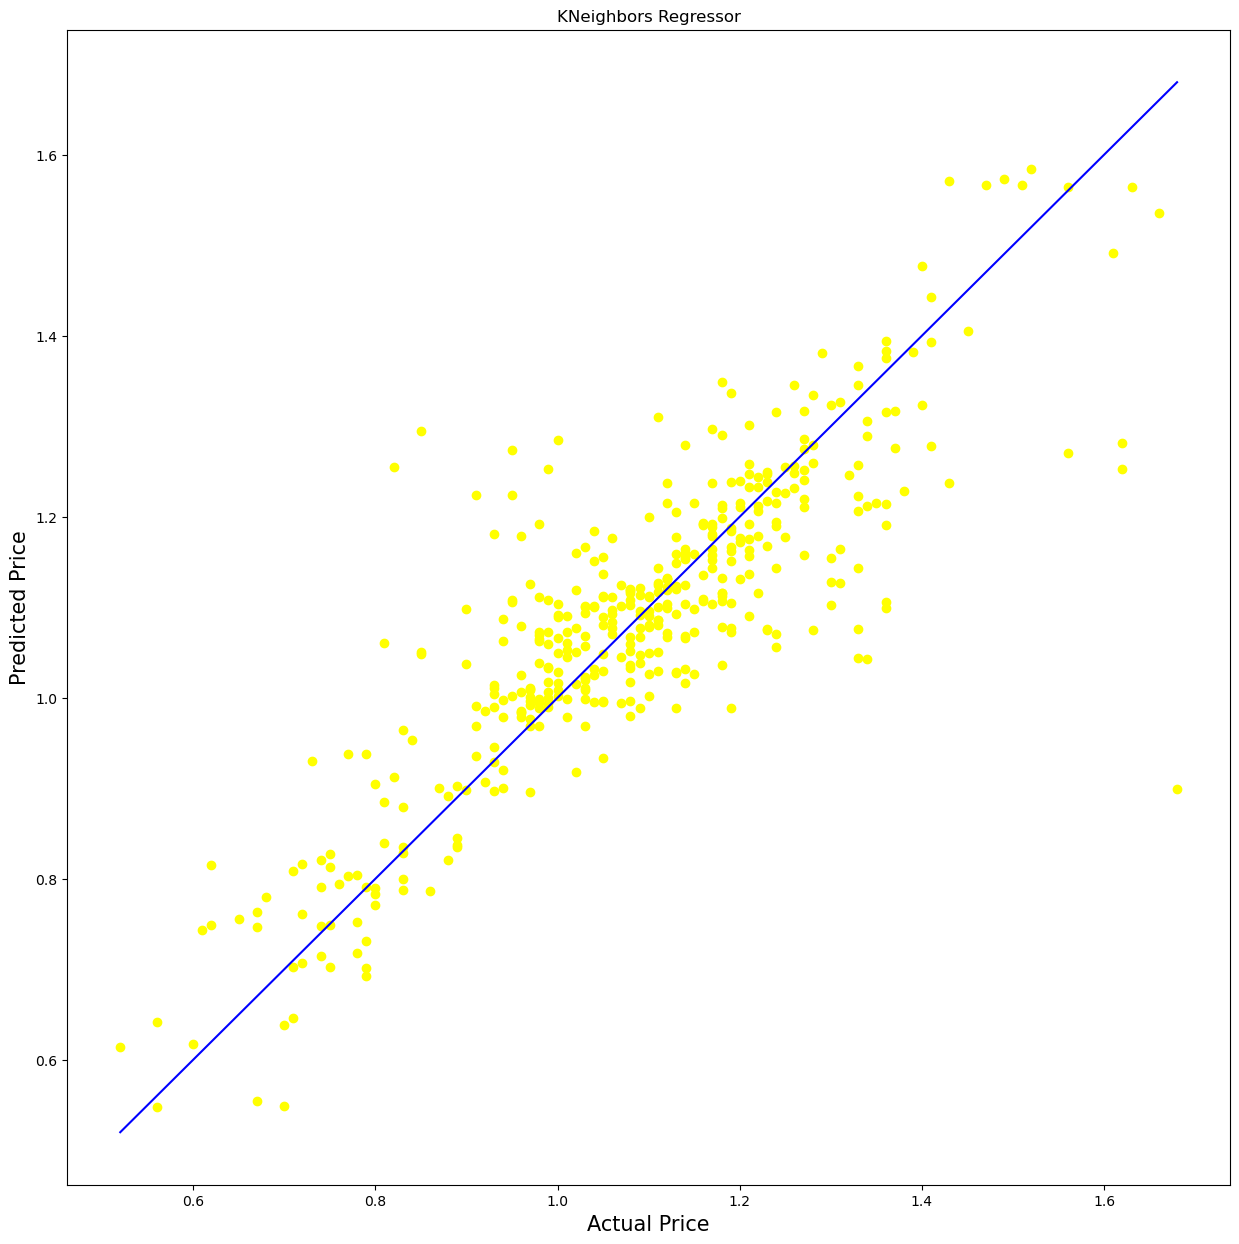

In [397]:
plt.figure(figsize=(15, 15))

plt.scatter(y_test, prediction, c ='Yellow')

plt1 = max(max(prediction), max(y_test))

plt2 = min(min(prediction), min(y_test))

plt.plot([plt1, plt2], [plt1, plt2], 'b-')

plt.title('KNeighbors Regressor')

plt.xlabel('Actual Price', fontsize = 15)

plt.ylabel('Predicted Price', fontsize = 15)

plt.show()